In [215]:
# importing the dataset
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [216]:
df = pd.read_csv('Members_Table_Updated.csv') 

In [217]:
df.columns

Index(['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name', 'Gender',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date', 'Weather Condition', 'Service Date', 'Service Day',
       'Service Type', 'Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast', 'Attendance'],
      dtype='object')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S/N                  1060 non-null   float64
 1   Member ID            1060 non-null   object 
 2   Group ID             1060 non-null   object 
 3   Church ID            1060 non-null   object 
 4   PCF ID               1060 non-null   object 
 5   Cell ID              1060 non-null   object 
 6   Department ID        1060 non-null   object 
 7   First Name           1060 non-null   object 
 8   Middle Name          1060 non-null   object 
 9   Last Name            1060 non-null   object 
 10  Gender               1060 non-null   object 
 11  Mobile 1             1060 non-null   float64
 12  Mobile 2             1060 non-null   float64
 13  Email                1060 non-null   object 
 14  Profession           1060 non-null   object 
 15  Address              1060 non-null   o

In [219]:
df.isnull().sum()

S/N                    1
Member ID              1
Group ID               1
Church ID              1
PCF ID                 1
Cell ID                1
Department ID          1
First Name             1
Middle Name            1
Last Name              1
Gender                 1
Mobile 1               1
Mobile 2               1
Email                  1
Profession             1
Address                1
Location               1
Entry Date             1
Weather Condition      1
Service Date           1
Service Day            1
Service Type           1
Service Time           1
Public Holiday         1
SMS Notification       1
Email Notification     1
SMS Reminder           1
Email Reminder         1
Free Transportation    1
External Speaker       1
Church Venue           1
Outreach Program       1
Love Feast             1
Attendance             0
dtype: int64

In [220]:
df.dropna(axis=0,how='any',inplace=True )

In [221]:
df.isnull().sum()

S/N                    0
Member ID              0
Group ID               0
Church ID              0
PCF ID                 0
Cell ID                0
Department ID          0
First Name             0
Middle Name            0
Last Name              0
Gender                 0
Mobile 1               0
Mobile 2               0
Email                  0
Profession             0
Address                0
Location               0
Entry Date             0
Weather Condition      0
Service Date           0
Service Day            0
Service Type           0
Service Time           0
Public Holiday         0
SMS Notification       0
Email Notification     0
SMS Reminder           0
Email Reminder         0
Free Transportation    0
External Speaker       0
Church Venue           0
Outreach Program       0
Love Feast             0
Attendance             0
dtype: int64

In [223]:
df[['Weather Condition', 'Service Day',
       'Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast']] = df[['Weather Condition', 'Service Day','Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast']].astype(int)
df.head()

,S/N,Member ID,Group ID,Church ID,PCF ID,Cell ID,Department ID,First Name,Middle Name,Last Name,...,SMS Notification,Email Notification,SMS Reminder,Email Reminder,Free Transportation,External Speaker,Church Venue,Outreach Program,Love Feast,Attendance
0,1.0,M001,G001,CH001,PCF001,C001,D001,Omolara,Sandra,Adeniyi,...,0,0,0,0,0,0,0,0,0,0
1,2.0,M002,G002,CH002,PCF002,C002,D002,Olaide,Oluwanisola,Agbaje,...,0,0,0,0,0,0,0,0,0,0
2,3.0,M003,G003,CH003,PCF003,C003,D003,Funmilayo,Makuachukwu,Onu,...,0,0,0,0,0,0,0,0,0,1
3,4.0,M004,G004,CH004,PCF004,C004,D004,Makinwa,Hope,Okonkwo,...,0,0,0,0,0,0,0,0,0,0
4,5.0,M005,G005,CH005,PCF005,C005,D005,Onome,Olaoluwa,Bode,...,0,0,0,0,0,0,0,0,0,1


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1059
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S/N                  1060 non-null   float64
 1   Member ID            1060 non-null   object 
 2   Group ID             1060 non-null   object 
 3   Church ID            1060 non-null   object 
 4   PCF ID               1060 non-null   object 
 5   Cell ID              1060 non-null   object 
 6   Department ID        1060 non-null   object 
 7   First Name           1060 non-null   object 
 8   Middle Name          1060 non-null   object 
 9   Last Name            1060 non-null   object 
 10  Gender               1060 non-null   object 
 11  Mobile 1             1060 non-null   float64
 12  Mobile 2             1060 non-null   float64
 13  Email                1060 non-null   object 
 14  Profession           1060 non-null   object 
 15  Address              1060 non-null   o

In [226]:
df.shape

(1060, 34)

In [227]:
df['Gender'].value_counts()

Male      530
Female    530
Name: Gender, dtype: int64

In [228]:
df['Service Day'].value_counts()

7    280
1    260
2    260
4    260
Name: Service Day, dtype: int64

In [229]:
df['Service Time'].value_counts()

1    520
3    500
2     40
Name: Service Time, dtype: int64

In [230]:
df['Email Reminder'].value_counts()

0    540
1    520
Name: Email Reminder, dtype: int64

In [231]:
df['SMS Notification'].value_counts()

0    540
1    520
Name: SMS Notification, dtype: int64

In [232]:
df['Email Notification'].value_counts()

0    540
1    520
Name: Email Notification, dtype: int64

In [233]:
df['SMS Reminder'].value_counts()

0    540
1    520
Name: SMS Reminder, dtype: int64

In [234]:
df['Free Transportation'].value_counts()

0    540
1    520
Name: Free Transportation, dtype: int64

In [235]:
df['External Speaker'].value_counts()

0    540
1    520
Name: External Speaker, dtype: int64

In [236]:
df['Church Venue'].value_counts()

0    540
1    520
Name: Church Venue, dtype: int64

In [237]:
df['Outreach Program'].value_counts()

0    540
1    520
Name: Outreach Program, dtype: int64

In [238]:
df['Love Feast'].value_counts()

0    540
1    520
Name: Love Feast, dtype: int64

In [239]:
df['Weather Condition'].value_counts()

2    580
1    480
Name: Weather Condition, dtype: int64

In [240]:
df['Attendance'].value_counts()

1    534
0    526
Name: Attendance, dtype: int64

In [241]:
df.columns

Index(['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name', 'Gender',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date', 'Weather Condition', 'Service Date', 'Service Day',
       'Service Type', 'Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast', 'Attendance'],
      dtype='object')

In [242]:
category_col =['Gender'] 
labelEncoder = preprocessing.LabelEncoder()
  
mapping_dict ={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
  
    le_name_mapping = dict(zip(labelEncoder.classes_,
                        labelEncoder.transform(labelEncoder.classes_)))
  
    mapping_dict[col]= le_name_mapping
print(mapping_dict)

{'Gender': {'Female': 0, 'Male': 1}}


In [243]:
df.shape

(1060, 34)

In [244]:
df["Gender"]

0       0
1       1
2       0
3       0
4       0
       ..
1055    1
1056    1
1057    1
1058    1
1059    1
Name: Gender, Length: 1060, dtype: int32

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [247]:
X = df[['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name', 'Gender',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date', 'Weather Condition', 'Service Date', 'Service Day',
       'Service Type', 'Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast']]
y = df["Attendance"]

X.columns

Index(['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name', 'Gender',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date', 'Weather Condition', 'Service Date', 'Service Day',
       'Service Type', 'Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast'],
      dtype='object')

In [248]:
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.3, random_state = 100)

  
X_train_data = X_train.drop(['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date','Service Type','Service Date'], axis=1)

X_test_data = X_test.drop(['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date','Service Type','Service Date'], axis=1)

In [252]:
model = LogisticRegression()

model.fit(X_train_data, y_train)
y_pred_proba = model.predict_proba(X_test_data)

In [253]:
y_pred = model.predict(X_test_data)

In [254]:
X_test.columns

Index(['S/N', 'Member ID', 'Group ID', 'Church ID', 'PCF ID', 'Cell ID',
       'Department ID', 'First Name', 'Middle Name', 'Last Name', 'Gender',
       'Mobile 1', 'Mobile 2', 'Email', 'Profession', 'Address', 'Location',
       'Entry Date', 'Weather Condition', 'Service Date', 'Service Day',
       'Service Type', 'Service Time', 'Public Holiday', 'SMS Notification',
       'Email Notification', 'SMS Reminder', 'Email Reminder',
       'Free Transportation', 'External Speaker', 'Church Venue',
       'Outreach Program', 'Love Feast'],
      dtype='object')

In [255]:
pred_cols = pd.DataFrame({
        "Member ID": X_test["Member ID"],
        "Group ID": X_test["Group ID"],
        "Church ID": X_test["Church ID"],
        "PCF ID": X_test["PCF ID"],
        "Cell ID": X_test["Cell ID"],
        "Department ID": X_test["Department ID"],
        "First Name": X_test["First Name"],
        "Last Name": X_test["Last Name"],
        "Attendance":y_test,
        "Attendance_Pred": y_pred
    })

In [256]:
pred_cols

,Member ID,Group ID,Church ID,PCF ID,Cell ID,Department ID,First Name,Last Name,Attendance,Attendance_Pred
101,M002,G002,CH002,PCF002,C002,D002,Olaide,Agbaje,0,0
552,M013,G013,CH013,PCF013,C013,D013,Charles,Udeh,0,0
459,M020,G020,CH020,PCF020,C020,D020,Jesse,Omoko,0,0
924,M005,G005,CH005,PCF005,C005,D005,Onome,Bode,1,0
342,M003,G003,CH003,PCF003,C003,D003,Funmilayo,Onu,0,1
...,...,...,...,...,...,...,...,...,...,...
23,M004,G004,CH004,PCF004,C004,D004,Makinwa,Okonkwo,0,0
1004,M005,G005,CH005,PCF005,C005,D005,Onome,Bode,0,0
109,M010,G010,CH010,PCF010,C010,D010,Oshoriame,Olumese,1,0
450,M011,G011,CH011,PCF011,C011,D011,Osasenega,Usoh,1,0


In [257]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[77, 77],
       [86, 78]], dtype=int64)

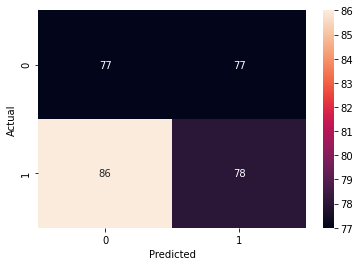

In [258]:
confusion_matrix_df = pd.crosstab(pred_cols['Attendance'], pred_cols['Attendance_Pred'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_df, annot=True)
plt.show()

In [259]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.48742138364779874


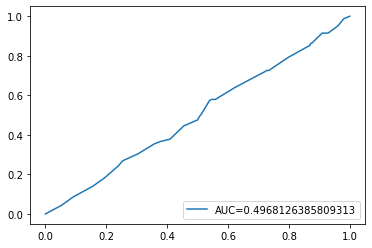

In [261]:
#define metrics
y_pred_proba = model.predict_proba(X_test_data)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [262]:
pickle.dump(model, open('model.pkl','wb'))

In [264]:
X_train_data.columns

Index(['Gender', 'Weather Condition', 'Service Day', 'Service Time',
       'Public Holiday', 'SMS Notification', 'Email Notification',
       'SMS Reminder', 'Email Reminder', 'Free Transportation',
       'External Speaker', 'Church Venue', 'Outreach Program', 'Love Feast'],
      dtype='object')